The Aroon indicator is composed of two components: The Aroon up line and the Aroon down line. The Aroon up line measures the strength of the uptrend in a market and similarly, the Aroon down line measures the strength of the downtrend in a market. The traditional setting for the Aroon indicator is either 14 for short-term or 25 for long-term as the lookback period. In this article, we will be using 25 as the setting since we will be dealing with a year and a half of data. The formula to calculate these two lines with 25 as the lookback period are as follows:

AROON UP = [ 25 - PERIODS SINCE 25 PERIOD HIGH ] / 25 * [ 100 ]
AROON DOWN = [ 25 - PERIODS SINCE 25 PERIOD LOW ] / 25 * [ 100 ]

The Aroon up line is calculated by first determining how long has it been since the stock has reached a new high over a 25-day timeframe, then, subtract and divide this value by 25 and finally multiply it by 100. This applies to calculating the Aroon down line too but here we are determining the number of days since a new low has occurred instead of observing new highs.

The main concept of the Aroon indicator is that the market tends to attain more new highs during a strong uptrend, and similarly, the market is bound to reach more new lows during a sturdy downtrend. With that being said, let’s explore how the Aroon indicator can be used to build a trading strategy.

To my knowledge, the Aroon Indicator can be used in two ways to build a trading strategy. First is the crossover trading strategy. This strategy reveals a buy signal if the Aroon up line crosses from below to above the Aroon down line, similarly, a sell signal is revealed if the Aroon up line moves from above to below the Aroon down line. The crossover strategy can be represented as follows:

IF P.UP LINE < P.DOWN LINE AND C.UP LINE > C.DOWN LINE --> BUY
IF P.UP LINE > P.DOWN LINE AND C.UP LINE < C.DOWN LINE --> SELL

The second strategy is constructing a higher and lower threshold which represents a buy signal if the Aroon up line has a reading of and above 70 and parallelly, the Aroon down line has a reading of and below 30. Likewise, when the Aroon up line has a reading of or below 30 and the reading of Aroon down line is observed to be at or above 70, a sell signal is revealed. This strategy can be represented as follows:

IF AROON UP LINE => 70 AND AROON DOWN LINE <= 30 --> BUY SIGNAL
IF AROON UP LINE <= 30 AND AROON DOWN LINE >= 70 --> SELL SIGNAL

Both the trading strategies are highly effective and can be used to trade any stocks. In this article, we are going to implement the second trading strategy of constructing thresholds just to make things simple. Now that we have an idea of what the Aroon indicator is all about, its calculation and usage. Let’s proceed to the programming part where we will build the second Aroon indicator strategy from scratch in python and backtest it on Tesla. Before moving on, a note on disclaimer: This article’s sole purpose is to educate people and must be considered as an information piece but not as investment advice or so.
Implementation in Python

The coding part is classified into various steps as follows

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
def get_historical_data(symbol, start_date):
    api_key = 'f9b5e68f0ed44209bcbb9253b2f8b3b6'
    api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&interval=1day&outputsize=5000&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['values']).iloc[::-1].set_index('datetime').astype(float)
    df = df[df.index >= start_date]
    df.index = pd.to_datetime(df.index)
    return df

tsla = get_historical_data('TSLA', '2020-01-01')
tsla

,open,high,low,close,volume
datetime,,,,,
2020-01-02,28.30000,28.71000,28.11000,28.68000,143375936.0
2020-01-03,29.37000,30.27000,29.13000,29.53000,266920720.0
2020-01-06,29.36000,30.10000,29.33000,30.10000,152362640.0
2020-01-07,30.76000,31.44000,30.22000,31.27000,273137344.0
2020-01-08,31.58000,33.23000,31.22000,32.81000,467991360.0
...,...,...,...,...,...
2023-11-02,212.97000,219.20000,211.45000,218.50999,125987600.0
2023-11-03,221.14999,226.37000,218.39999,219.96001,119281000.0
2023-11-06,223.98000,226.32001,215.00000,219.27000,117335800.0


In [4]:
def get_aroon(symbol, lookback, start_date):
    api_key = 'f9b5e68f0ed44209bcbb9253b2f8b3b6'
    api_url = f'https://api.twelvedata.com/aroon?symbol={symbol}&interval=1day&time_period={lookback}&outputsize=5000&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['values']).iloc[::-1].set_index('datetime').astype(float)
    df = df[df.index >= start_date]
    df.index = pd.to_datetime(df.index)
    aroon_up = df['aroon_up']
    aroon_down = df['aroon_down']
    return aroon_up, aroon_down

tsla['aroon_up'], tsla['aroon_down'] = get_aroon('TSLA', 25, '2020-01-01')
tsla.tail()

,open,high,low,close,volume,aroon_up,aroon_down
datetime,,,,,,,
2023-11-02,212.97000,219.20000,211.45000,218.50999,125987600.0,32.0,92.0
2023-11-03,221.14999,226.37000,218.39999,219.96001,119281000.0,28.0,88.0
2023-11-06,223.98000,226.32001,215.00000,219.27000,117335800.0,24.0,84.0
2023-11-07,219.98000,223.12000,215.72000,222.17999,116900100.0,20.0,80.0
2023-11-08,223.14999,224.14999,217.64000,222.11000,106380700.0,16.0,76.0


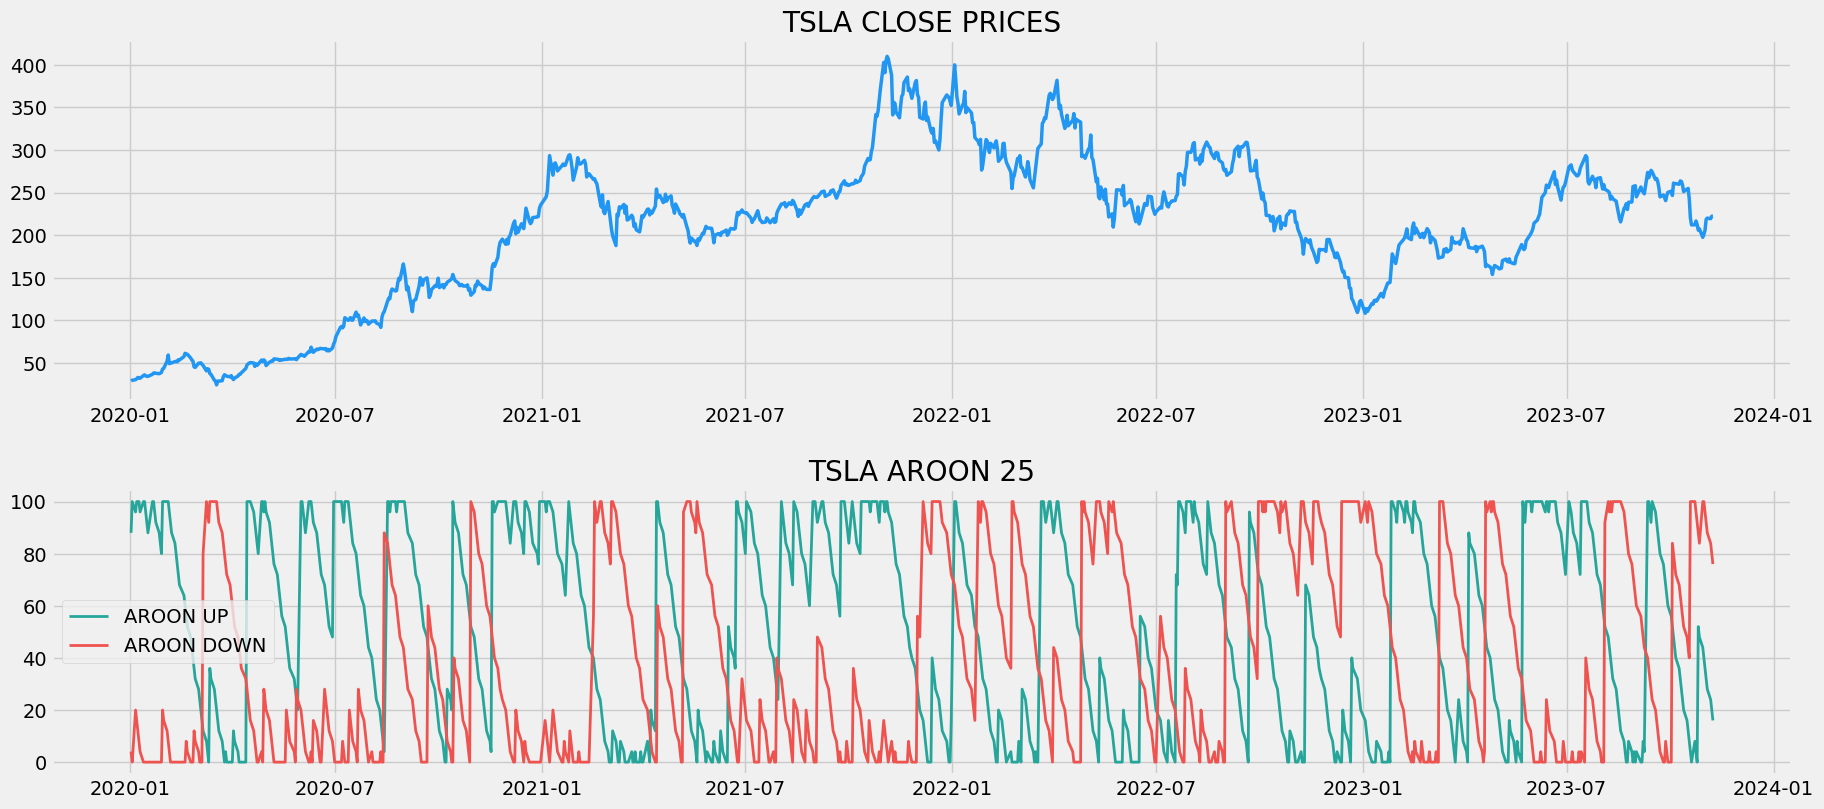

In [5]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(tsla['close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('TSLA CLOSE PRICES')
ax2.plot(tsla['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(tsla['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('TSLA AROON 25')
plt.show()

In [6]:
def implement_aroon_strategy(prices, up, down):
    buy_price = []
    sell_price = []
    aroon_signal = []
    signal = 0

    for i in range(len(prices)):
        if up[i] >= 70 and down[i] <= 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        elif up[i] <= 30 and down[i] >= 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            aroon_signal.append(0)

    return buy_price, sell_price, aroon_signal

buy_price, sell_price, aroon_signal = implement_aroon_strategy(tsla['close'], tsla['aroon_up'], tsla['aroon_down'])

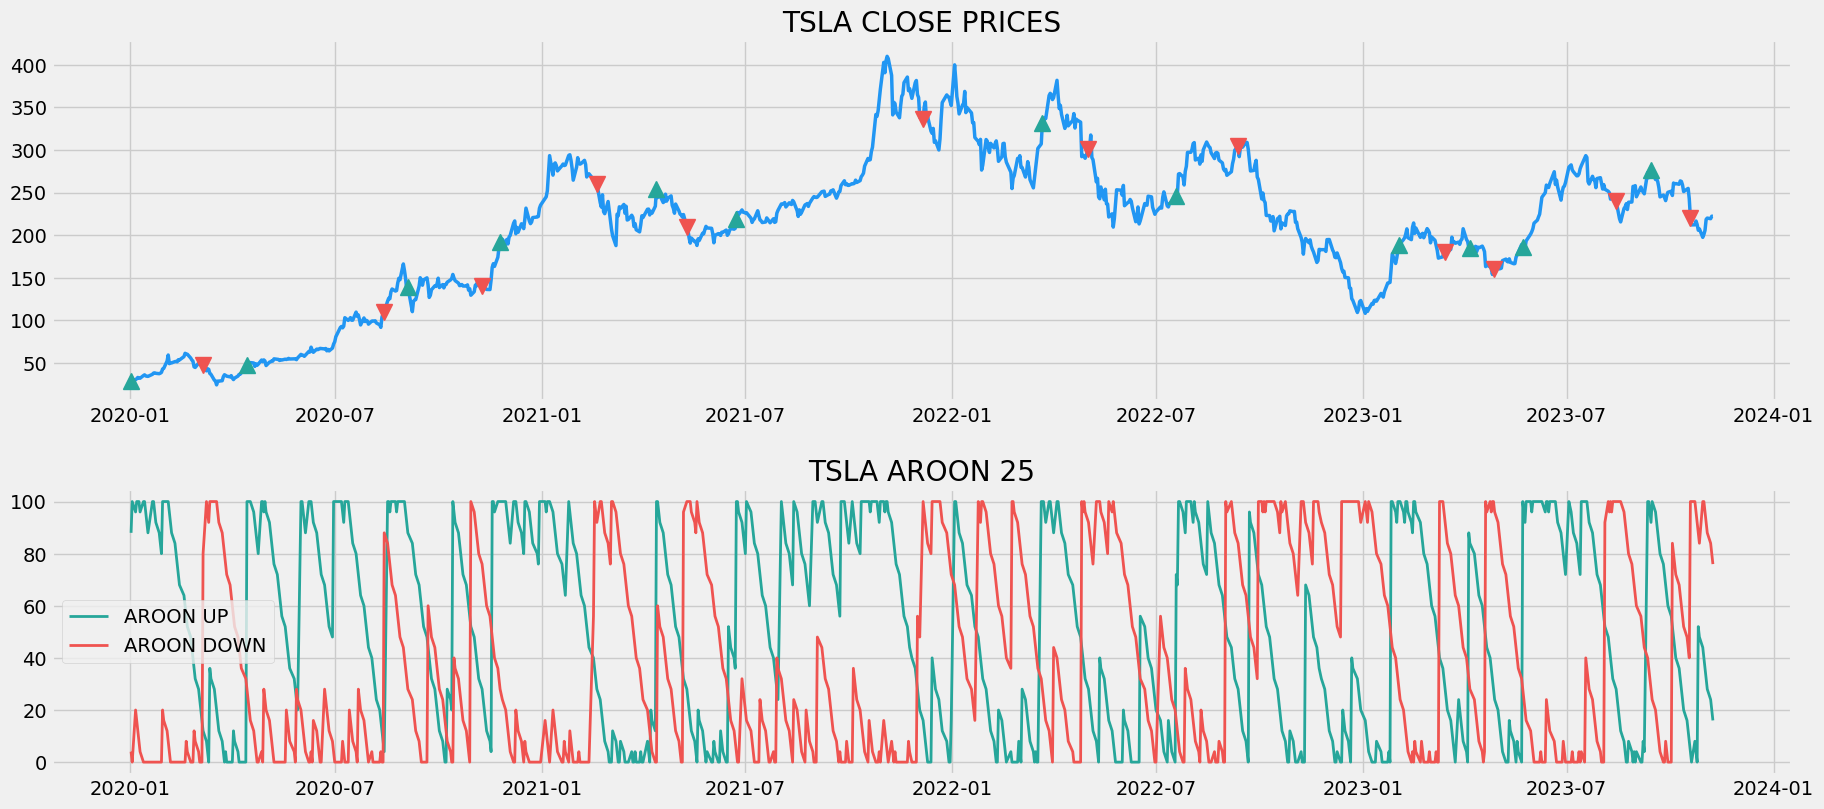

In [7]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(tsla['close'], linewidth = 2.5, color = '#2196f3')
ax1.plot(tsla.index, buy_price, marker = '^', color = '#26a69a', markersize = 12)
ax1.plot(tsla.index, sell_price, marker = 'v', color = '#ef5350', markersize = 12)
ax1.set_title('TSLA CLOSE PRICES')
ax2.plot(tsla['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(tsla['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('TSLA AROON 25')
plt.show()

In [8]:
position = []
for i in range(len(aroon_signal)):
    if aroon_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)

for i in range(len(tsla['close'])):
    if aroon_signal[i] == 1:
        position[i] = 1
    elif aroon_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

aroon_up = tsla['aroon_up']
aroon_down = tsla['aroon_down']
close_price = tsla['close']
aroon_signal = pd.DataFrame(aroon_signal).rename(columns = {0:'aroon_signal'}).set_index(tsla.index)
position = pd.DataFrame(position).rename(columns = {0:'aroon_position'}).set_index(tsla.index)

frames = [close_price, aroon_up, aroon_down, aroon_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,close,aroon_up,aroon_down,aroon_signal,aroon_position
datetime,,,,,
2020-01-02,28.68000,88.0,4.0,1,1
2020-01-03,29.53000,100.0,0.0,0,1
2020-01-06,30.10000,96.0,20.0,0,1
2020-01-07,31.27000,100.0,16.0,0,1
2020-01-08,32.81000,100.0,12.0,0,1
...,...,...,...,...,...
2023-11-02,218.50999,32.0,92.0,0,0
2023-11-03,219.96001,28.0,88.0,0,0
2023-11-06,219.27000,24.0,84.0,0,0


In [9]:
tsla_ret = pd.DataFrame(np.diff(tsla['close'])).rename(columns = {0:'returns'})
aroon_strategy_ret = []

for i in range(len(tsla_ret)):
    returns = tsla_ret['returns'][i]*strategy['aroon_position'][i]
    aroon_strategy_ret.append(returns)

aroon_strategy_ret_df = pd.DataFrame(aroon_strategy_ret).rename(columns = {0:'aroon_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/tsla['close'][-1])
aroon_investment_ret = []

for i in range(len(aroon_strategy_ret_df['aroon_returns'])):
    returns = number_of_stocks*aroon_strategy_ret_df['aroon_returns'][i]
    aroon_investment_ret.append(returns)

aroon_investment_ret_df = pd.DataFrame(aroon_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(aroon_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the Aroon strategy by investing $100k in TSLA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the Aroon strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the Aroon strategy by investing $100k in TSLA : 98092.85
Profit percentage of the Aroon strategy : 98%


Code Explanation: First, we are calculating the returns of the Tesla stock using the ‘diff’ function provided by the NumPy package and we have stored it as a dataframe into the ‘tsla_ret’ variable. Next, we are passing a for-loop to iterate over the values of the ‘tsla_ret’ variable to calculate the returns we gained from our Aroon indicator trading strategy, and these returns values are appended to the ‘aroon_strategy_ret’ list. Next, we are converting the ‘aroon_strategy_ret’ list into a dataframe and stored it into the ‘aroon_strategy_ret_df’ variable.

Next comes the backtesting process. We are going to backtest our strategy by investing a hundred thousand USD into our trading strategy. So first, we are storing the amount of investment into the ‘investment_value’ variable. After that, we are calculating the number of Tesla stocks we can buy using the investment amount. You can notice that I’ve used the ‘floor’ function provided by the Math package because, while dividing the investment amount by the closing price of Tesla stock, it spits out an output with decimal numbers. The number of stocks should be an integer but not a decimal number. Using the ‘floor’ function, we can cut out the decimals. Remember that the ‘floor’ function is way more complex than the ‘round’ function. Then, we are passing a for-loop to find the investment returns followed by some data manipulations tasks.

Finally, we are printing the total return we got by investing a hundred thousand into our trading strategy and it is revealed that we have made an approximate profit of fifty-five thousand USD in one year. That’s not bad! Now, let’s compare our returns with SPY ETF (an ETF designed to track the S&P 500 stock market index) returns.
Step-9: SPY ETF Comparison

This step is optional but it is highly recommended as we can get an idea of how well our trading strategy performs against a benchmark (SPY ETF). In this step, we are going to extract the data of the SPY ETF using the ‘get_historical_data’ function we created and compare the returns we get from the SPY ETF with our Aroon indicator strategy returns on Tesla.

In [10]:
def get_benchmark(start_date, investment_value):
    spy = get_historical_data('SPY', start_date)['close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})

    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[-1])
    benchmark_investment_ret = []

    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = get_benchmark('2020-01-01', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
print(cl('Aroon Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs = ['bold']))

Benchmark profit by investing $100k : 25622.64
Benchmark Profit percentage : 25%
Aroon Strategy profit is 73% higher than the Benchmark Profit
